<a href="https://colab.research.google.com/github/Swastik-Samanta/Machine-Learning-Trading-Strategy/blob/main/Investment_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: This program uses machine learning in order to create a simple trading/investment strategy

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [3]:
# Load the data
from google.colab import files
files.upload()

Saving DNMR (1).csv to DNMR (1).csv


{'DNMR (1).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2022-03-23,5.850000,6.490000,5.775000,6.000000,6.000000,3227500\n2022-03-24,6.090000,6.120000,5.630000,5.890000,5.890000,2212900\n2022-03-25,5.970000,5.970000,5.280000,5.760000,5.760000,3454700\n2022-03-28,5.800000,5.950000,5.545000,5.740000,5.740000,1439300\n2022-03-29,5.830000,6.775000,5.770000,6.370000,6.370000,4537700\n2022-03-30,6.220000,6.630000,5.910000,6.050000,6.050000,2690800\n2022-03-31,6.110000,6.130000,5.735000,5.860000,5.860000,3748300\n2022-04-01,6.000000,6.040000,5.650000,5.830000,5.830000,1723600\n2022-04-04,5.870000,6.650000,5.860000,6.530000,6.530000,3321000\n2022-04-05,6.510000,6.590000,5.920000,6.040000,6.040000,2117800\n2022-04-06,5.890000,5.955000,5.433000,5.740000,5.740000,2802200\n2022-04-07,5.800000,5.980000,5.320000,5.630000,5.630000,2149400\n2022-04-08,5.650000,5.650000,5.270000,5.280000,5.280000,1805800\n2022-04-11,5.160000,5.335000,4.960000,5.190000,5.190000,2079800\n2022-04-12,5.280000,5.540000

In [5]:
# Read in the csv file
df = pd.read_csv('DNMR (1).csv')
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-23,5.85,6.490,5.775,6.0000,6.0000,3227500
1,2022-03-24,6.09,6.120,5.630,5.8900,5.8900,2212900
2,2022-03-25,5.97,5.970,5.280,5.7600,5.7600,3454700
3,2022-03-28,5.80,5.950,5.545,5.7400,5.7400,1439300
4,2022-03-29,5.83,6.775,5.770,6.3700,6.3700,4537700
...,...,...,...,...,...,...,...
247,2023-03-17,2.16,2.190,2.020,2.0900,2.0900,1594800
248,2023-03-20,2.10,2.120,1.860,1.8700,1.8700,2025400
249,2023-03-21,1.99,2.100,1.950,2.0900,2.0900,775100
250,2023-03-22,2.07,2.090,1.809,1.8800,1.8800,2111800


In [6]:
# Set the data column as the index
df.index = pd.to_datetime(df['Date'])
# Drop the date column
df = df.drop(['Date'], axis= 'columns')
# Show the data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-23,5.85,6.490,5.775,6.0000,6.0000,3227500
2022-03-24,6.09,6.120,5.630,5.8900,5.8900,2212900
2022-03-25,5.97,5.970,5.280,5.7600,5.7600,3454700
2022-03-28,5.80,5.950,5.545,5.7400,5.7400,1439300
2022-03-29,5.83,6.775,5.770,6.3700,6.3700,4537700
...,...,...,...,...,...,...
2023-03-17,2.16,2.190,2.020,2.0900,2.0900,1594800
2023-03-20,2.10,2.120,1.860,1.8700,1.8700,2025400
2023-03-21,1.99,2.100,1.950,2.0900,2.0900,775100


In [7]:
# Create the independent variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [8]:
# Store the independent variables in a variable called 'X'
X = df[['Open-Close', 'High-Low', 'Close']]
# Show the first five rows of data
df.head()

,Open,High,Low,Close,Adj Close,Volume,High-Low,Open-Close
Date,,,,,,,,
2022-03-23,5.85,6.490,5.775,6.00,6.00,3227500,0.715,-0.15
2022-03-24,6.09,6.120,5.630,5.89,5.89,2212900,0.490,0.20
2022-03-25,5.97,5.970,5.280,5.76,5.76,3454700,0.690,0.21
2022-03-28,5.80,5.950,5.545,5.74,5.74,1439300,0.405,0.06
2022-03-29,5.83,6.775,5.770,6.37,6.37,4537700,1.005,-0.54


In [9]:
# Store the target variable into a variable called 'Y'
# If tommorow's close price is greater than today's close price, put in 1, else 0
y = np.where(df.Close.shift(-1) > df.Close, 1, 0)
# Show the data
y

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [10]:
# Get the percentage to split the data (90% train data set, 10% test data set)
percentage_split = 0.9
row = int( df.shape[0] * percentage_split )

# Create the train data set 
X_train = X[:row]
y_train = y[:row]

# Create the test data set
X_test = X[row:]
y_test = y[row:]

In [11]:
# import the library for the machine learning model called Support Vector Classifier (SVC)
from sklearn.svm import SVC
# Create the model
model = SVC()
# Train the model
model.fit(X_train[['Open-Close', 'High-Low']], y_train)

SVC()

In [12]:
# Check the score of the model on the train data set
model.score(X_train[['Open-Close', 'High-Low']], y_train)

0.584070796460177

In [13]:
# Check the score of the model on the test data set
model.score(X_test[['Open-Close', 'High-Low']], y_test)

0.7307692307692307

In [14]:
# Make and show the model's predictions
df['Predictions'] = model.predict(X[['Open-Close', 'High-Low']])
# Show the predictions
df['Predictions']

Date
2022-03-23    0
2022-03-24    0
2022-03-25    0
2022-03-28    0
2022-03-29    0
             ..
2023-03-17    0
2023-03-20    0
2023-03-21    0
2023-03-22    0
2023-03-23    0
Name: Predictions, Length: 252, dtype: int64

In [15]:
# Calculate the daily returns
df['Return'] = df['Close'].pct_change(1)
# Show the returns
df['Return']

Date
2022-03-23         NaN
2022-03-24   -0.018333
2022-03-25   -0.022071
2022-03-28   -0.003472
2022-03-29    0.109756
                ...   
2023-03-17   -0.054299
2023-03-20   -0.105263
2023-03-21    0.117647
2023-03-22   -0.100478
2023-03-23    0.074521
Name: Return, Length: 252, dtype: float64

In [16]:
# Calculate the strategy returns
df['Strat_Return'] = df['Predictions'].shift(1) * df['Return']
# Show the strategy returns
df['Strat_Return']

Date
2022-03-23    NaN
2022-03-24   -0.0
2022-03-25   -0.0
2022-03-28   -0.0
2022-03-29    0.0
             ... 
2023-03-17   -0.0
2023-03-20   -0.0
2023-03-21    0.0
2023-03-22   -0.0
2023-03-23    0.0
Name: Strat_Return, Length: 252, dtype: float64

In [17]:
# Calculate the cumulative returns
df['Cumul_Ret'] = df['Return'].cumsum()
# Calculation of the strategy cumulative returns
df['Cumul_Strategy'] = df['Strat_Return'].cumsum()

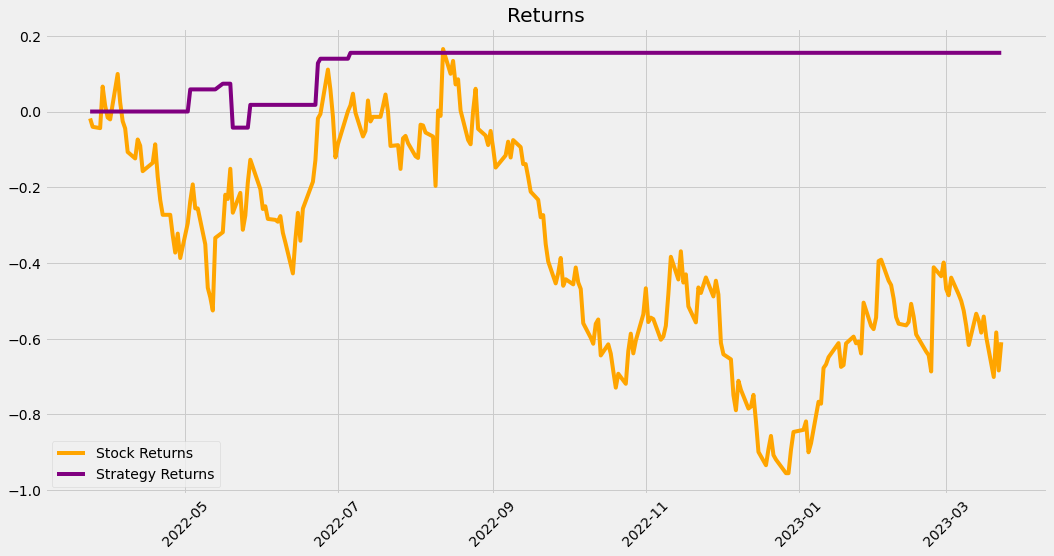

In [18]:
# Visualize and show the data
plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(df['Cumul_Ret'], color= 'orange', label='Stock Returns')
plt.plot(df['Cumul_Strategy'], color= 'purple', label='Strategy Returns')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [19]:
# Print the returns
print('The stock gives a return of', df['Cumul_Ret'][-1]*100, '%')
print('The strategy gives a return of', df['Cumul_Strategy'][-1]*100, '%')

The stock gives a return of -60.925156476085164 %
The strategy gives a return of 15.50053484192354 %


In [20]:
# Print last index of Predictions column. If the entry is 1 buy, if it is 0 either hold or sell.
df['Predictions'].tail(1)

Date
2023-03-23    0
Name: Predictions, dtype: int64